In [1]:
from particletracking import dataframes

In [2]:
data = dataframes.DataStore("/media/data/Data/FirstOrder/Hysterisis/5Repeats/RedTrayDense/0.1_up_1.hdf5")

In [3]:
data.df.head()

,x,y,r,Duty,order_r,order_i,neighbors,order,density,shape_factor,on_edge
frame,,,,,,,,,,,
0,1387,1285,17,599.933333,-0.951766,-0.061100,6,0.953725,0.821310,1.105886,False
0,622,1457,17,599.933333,-0.969736,-0.019360,6,0.969929,0.799266,1.103900,False
0,375,937,17,599.933333,-0.972360,0.009673,6,0.972409,0.842170,1.105498,False
0,794,410,17,599.933333,-0.901138,-0.027844,6,0.901568,0.775252,1.107113,False
0,1080,546,17,599.933333,-0.844104,-0.110442,5,0.851299,0.773339,1.112804,False


In [15]:
import pandas as pd

In [22]:
def count_neighbours(df):
    return df.value_counts()

In [23]:
neighbors = data.df['neighbors'].groupby('frame').apply(count_neighbours)

In [24]:
neighbors

frame   
0      6    846
       5    743
       4    374
       3    132
       2    105
           ... 
50999  2    427
       5    162
       1    141
       0     36
       6     10
Name: neighbors, Length: 357190, dtype: int64

In [34]:
neighbors = data.df.groupby(['frame', 'neighbors']).x.count()

In [47]:
neighbors = neighbors.unstack(1)

In [52]:
neighbors['total'] = neighbors.sum(axis=1)

In [53]:
neighbors

neighbors,0,1,2,3,4,5,6,7,total
frame,,,,,,,,,
0,8.0,61.0,105.0,132.0,374.0,743.0,846.0,NaN,2269.0
1,10.0,64.0,110.0,143.0,304.0,723.0,920.0,NaN,2274.0
2,4.0,67.0,111.0,148.0,336.0,767.0,846.0,NaN,2279.0
3,4.0,63.0,104.0,161.0,293.0,710.0,939.0,NaN,2274.0
4,7.0,57.0,96.0,136.0,346.0,747.0,882.0,NaN,2271.0
...,...,...,...,...,...,...,...,...,...
50995,40.0,162.0,426.0,646.0,490.0,136.0,8.0,NaN,1908.0
50996,32.0,156.0,430.0,663.0,482.0,139.0,8.0,NaN,1910.0
50997,38.0,163.0,402.0,647.0,493.0,152.0,5.0,NaN,1900.0


In [25]:
import matplotlib.pyplot as plt

In [57]:
plt.plot(neighbors.index, neighbors[0]/neighbors['total'])
plt.plot(neighbors.index, neighbors[1]/neighbors['total'])
plt.plot(neighbors.index, neighbors[2]/neighbors['total'])
plt.plot(neighbors.index, neighbors[3]/neighbors['total'])
plt.plot(neighbors.index, neighbors[4]/neighbors['total'])
plt.plot(neighbors.index, neighbors[5]/neighbors['total'])

In [5]:
first_frame = data.df.loc[0, ['x', 'y']]

In [6]:
first_frame

,x,y
frame,,
0,1387,1285
0,622,1457
0,375,937
0,794,410
0,1080,546
...,...,...
0,132,1095
0,313,901
0,389,258


In [7]:
from scipy import spatial

In [10]:
vor = spatial.Voronoi(first_frame.values)

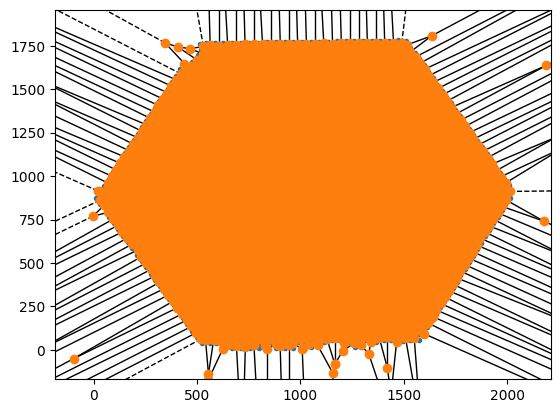

In [14]:
spatial.voronoi_plot_2d(vor)

In [12]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [16]:
import numpy as np

In [17]:
np.unique(data.df.index.values).size

51000

In [18]:
middle_frame = data.df.loc[25000, ['x', 'y']]

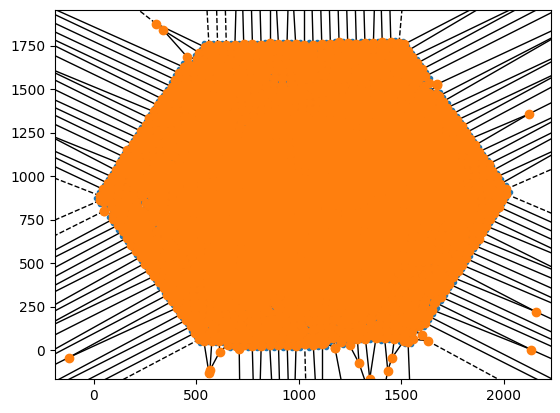

In [19]:
spatial.voronoi_plot_2d(spatial.Voronoi(middle_frame))

In [56]:
def plot_voronoi(data, f):
    frame = data.df.loc[f, ['x', 'y']]
    vor = spatial.Voronoi(frame)
    spatial.voronoi_plot_2d(vor)
    n_vertices = np.array([len(r) for r in vor.regions])
    plt.plot(frame.x[n_vertices==5], frame.y[n_vertices==5], 's', label='5')
    plt.plot(frame.x[n_vertices==7], frame.y[n_vertices==7], 's', label='7')
    plt.xlim([750, 1250])
    plt.ylim([750, 1250])
    plt.legend()

In [57]:
plot_voronoi(data, 30000)

2007
2006


IndexError: Boolean index has wrong length: 2007 instead of 2006

In [63]:
len(vor.points)

2269

In [64]:
len(vor.point_region)

2269

In [67]:
vor.point_region[1]

1772

In [68]:
len(vor.regions)

2270